In [1]:
include("AutomDiff.jl")
using AD, PyPlot

# Tarea4: Derivación automática 2

Fecha de envío del PR inicial: **viernes 7 de abril**

Fecha de aceptación del PR: **martes 18 de abril, antes de la clase**

---

## Ejercicio 1

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.io/en/stable/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea4.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Pueden aprovechar las capacidades de Julia en metaprogramming.

In [2]:
import Base: sqrt, cbrt

sqrt(a::Dual) = Dual(sqrt(a.fun), 0.5 * a.der / sqrt(a.fun))
cbrt(a::Dual) = Dual(cbrt(a.fun), (1/3) * a.der / cbrt(a.fun^2))

cbrt (generic function with 7 methods)

In [3]:
import Base: exp, log

exp(a::Dual) = Dual(exp(a.fun), a.der * exp(a.fun))
log(a::Dual) = Dual(log(a.fun), a.der / a.fun)

log (generic function with 19 methods)

In [4]:
import Base: sin, cos, tan

sin(a::Dual) = Dual(sin(a.fun), a.der * cos(a.fun))
cos(a::Dual) = Dual(cos(a.fun), -a.der * sin(a.fun))
tan(a::Dual) = Dual(tan(a.fun), a.der * sec(a.fun)^2)

tan (generic function with 11 methods)

In [5]:
import Base: sec, csc, cot

sec(a::Dual) = Dual(sec(a.fun), a.der * tan(a.fun) * sec(a.fun))
csc(a::Dual) = Dual(csc(a.fun), -a.der * cot(a.fun) * csc(a.fun))
cot(a::Dual) = Dual(cot(a.fun), -a.der * csc(a.fun)^2)

cot (generic function with 5 methods)

In [6]:
import Base: sinh, cosh, tanh

sinh(a::Dual) = Dual(sinh(a.fun), a.der * cosh(a.fun))
cosh(a::Dual) = Dual(cosh(a.fun), a.der * sinh(a.fun))
tanh(a::Dual) = Dual(tanh(a.fun), a.der * sech(a.fun)^2)

tanh (generic function with 13 methods)

In [7]:
import Base: sech, csch, coth

sech(a::Dual) = Dual(sech(a.fun), -a.der * tanh(a.fun) * sech(a.fun))
csch(a::Dual) = Dual(csch(a.fun), -a.der * coth(a.fun) * csch(a.fun))
coth(a::Dual) = Dual(coth(a.fun), -a.der * csch(a.fun)^2)

coth (generic function with 6 methods)

---

## Ejercicio 2

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [8]:
x_0 = xdual(2)

AD.Dual{Int64}(2,1)

In [9]:
f(x) = sin(x^3 - 2 / x^6)
df(x) = (3 * x^2 + 12 / x^7) * cos(x^3 - 2 / x^6)
r = f(x_0)

AD.Dual{Float64}(0.9934213368955197,-1.384934905523464)

In [10]:
isequal(f(2), r.fun), isequal(df(2), r.der)

(true,true)

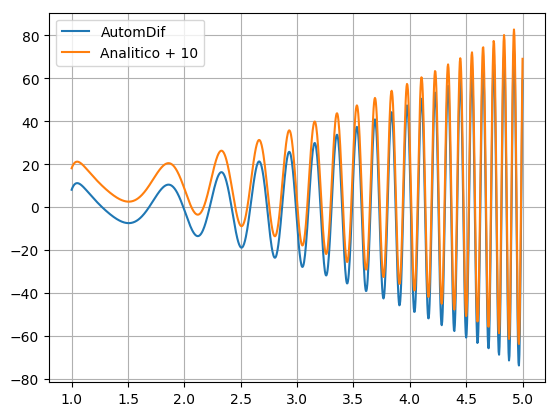

In [11]:
x = linspace(1, 5, 1000)
y_1 = zeros(x)
y_2 = zeros(x)
err = zeros(x)
                    # Se definieron las funciones  fun() y der() que regresan la parte fun o der de un dual
                    # esto para poder utilizarla con el punto tal que lo haga por elementos.
x_0 = xdual.(x)     # generamos un arreglo de duales
y_1 = der.(f.(x_0)) # calculamos la funcion con el dual como argumento y lo separamos conla funcion der(), elementwise
y_2 = df.(x) .+ 10  # Le sumo 10 solo para separar las graficas y se aprecie bien la forma.

err = y_1 - y_2 + 10

plot(x, y_1, label  = "AutomDif")
plot(x, y_2, label  = "Analitico + 10")
legend()
grid()
show()

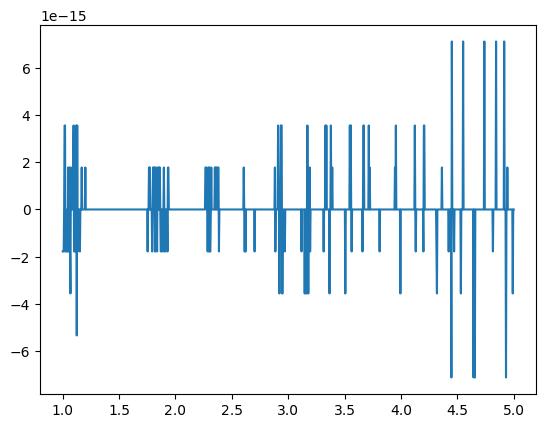

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0341088dd8>

In [12]:
plot(x, err)

---

## Ejercicio 3

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [13]:
function newton(f::Function, x)
    
    max = 0
    val = Inf
    
    while(abs(f(x)) > 1e-16 && max < 1000)  # Hago la evaluacion en f(x), ya que si el punto inicial que damos es la raiz, lo regresara automaticamente sin pasar por el while
        
        a = f(xdual(x))
        x = x - a.fun / a.der
        
        val = abs(f(x))
        max += 1
    end
    
    if max == 1000
        "el metodo no converge"
    else
        return x, val
    end
end

newton (generic function with 1 method)

In [14]:
w_6(x) = (x - 1) * (x - 2) * (x - 3) * (x - 4) * (x - 5) * (x - 6)

w_6 (generic function with 1 method)

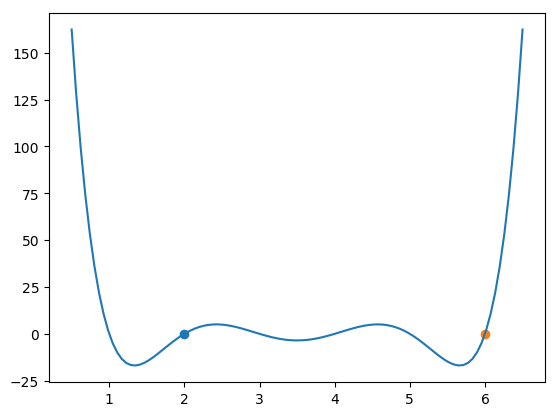

(2.0,0.0)
(6.0,0.0)


PyObject <matplotlib.collections.PathCollection object at 0x7f0341031940>

In [15]:
x = linspace(0.5, 6.5, 100)
y = w_6.(x)

x_0 = newton(w_6, 2.2)
x_1 = newton(w_6, 2.45)

println(x_0)
println(x_1)

plot(x, y)
scatter(x_0...)
scatter(x_1...);

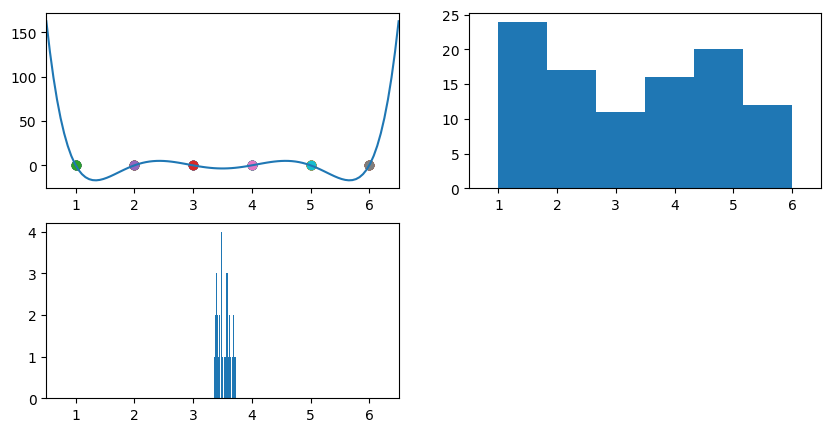

In [130]:
x = linspace(0.5, 6.5,100)
y = w_6.(x)

x_ = 3.5 .+ 0.1 .* randn(100)

fig = figure(figsize=(10,5))
ax = subplot(221)
ax[:plot](x, y)
ax[:set_xlim](0.5, 6.5);

z = zeros(x_)

for (i, j) = enumerate(x_)
    x_0 = newton(w_6, j)
    z[i] = x_0[1]
    ax[:scatter](x_0...)
end

bx = subplot(222)
bx[:hist](z, 6);
bx[:set_xlim](0.5, 6.5);

cx = subplot(223)
cx[:hist](x_, 100)
cx[:set_xlim](0.5, 6.5);

In [17]:
g(x) = x * sin(2 * x)
newton(g, 0.07)

(4.154133121221297e-9,3.451364397765559e-17)

---

## Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.


Creo que para resolver este problema tendríamos que definir tipos para la n-ésima derivada. Esto resultaría impráctico ya que tendríamos que definir todas las operaciones y funciones para cada uno de estos. 

Creo que lo más útil sería encontrar una relación que se cumpla para determinar la n-ésima derivada y utilizar metaprogramación para definir todo.


**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea, aunque sí se les dará retroalimentación respecto a lo que escriben. La idea es empezar a pensar en esto.